In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Data Loading and Inspection

In [165]:
# Load the diamonds dataset
df = pd.read_csv(r'diamonds.csv')

In [166]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


In [168]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y
count,53947.000000,53947.000000,53946.000000,53947.000000,53947.000000,53947.000000,53947.000000
mean,26973.000000,0.797936,61.749271,57.457143,3932.614158,5.731181,5.734549
std,15573.301823,0.473981,1.432571,2.234418,3989.233934,1.121691,1.142063
min,0.000000,0.200000,43.000000,43.000000,-200.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000
50%,26973.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000
75%,40459.500000,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000
max,53946.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000


# Data Cleaning

In [169]:
df.shape

(53947, 11)

In [170]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
carat         0
cut           3
color         1
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [171]:
df['cut'].fillna(df['cut'].mode()[0], inplace=True)

C:\Users\Doha\AppData\Local\Temp\ipykernel_7528\330837955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cut'].fillna(df['cut'].mode()[0], inplace=True)


In [172]:
df['color'].fillna(df['color'].mode()[0], inplace=True)

C:\Users\Doha\AppData\Local\Temp\ipykernel_7528\3876112393.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color'].fillna(df['color'].mode()[0], inplace=True)


In [173]:
df['depth'].fillna(df['depth'].mode()[0], inplace=True)

C:\Users\Doha\AppData\Local\Temp\ipykernel_7528\955171951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth'].fillna(df['depth'].mode()[0], inplace=True)


In [174]:
# Drop the 'Unnamed: 0' column as it's just an index
df.drop(columns=['Unnamed: 0'], inplace=True)

In [175]:
# Verify data cleaning
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


# Exploratory Data Analysis (EDA)

### 1- Price Distribution
Most diamonds are cheap, few are very expensive (right skew)

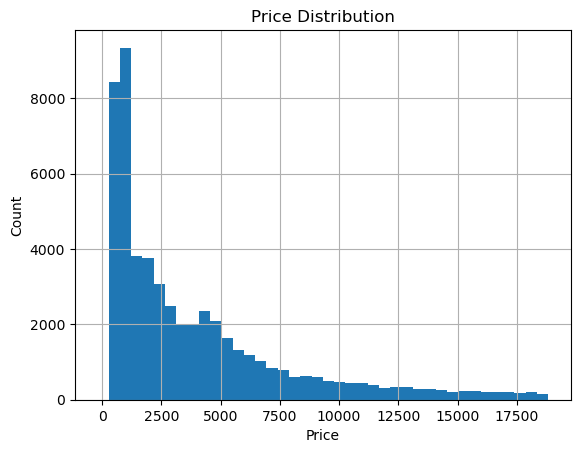

In [176]:
df["price"].hist(bins=40)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


### 2- Carat vs Price

As weight increases > price increases strongly.

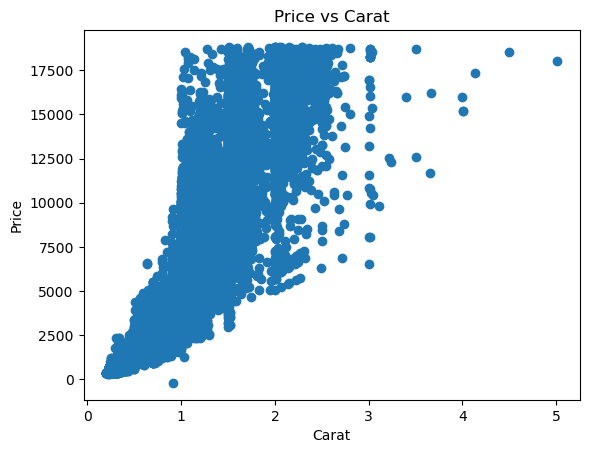

In [177]:
plt.scatter(df["carat"], df["price"])
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Price vs Carat")
plt.show()


### 3- Price by Cut

Better cut > generally higher price.

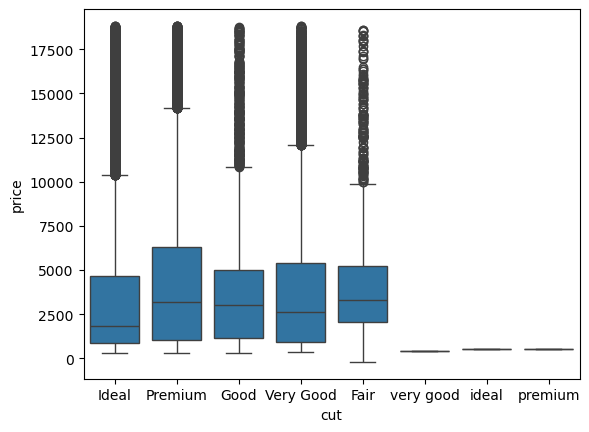

In [178]:
sns.boxplot(x="cut", y="price", data=df)
plt.show()

### 4- Price by Clarity

Clearer diamonds cost more.

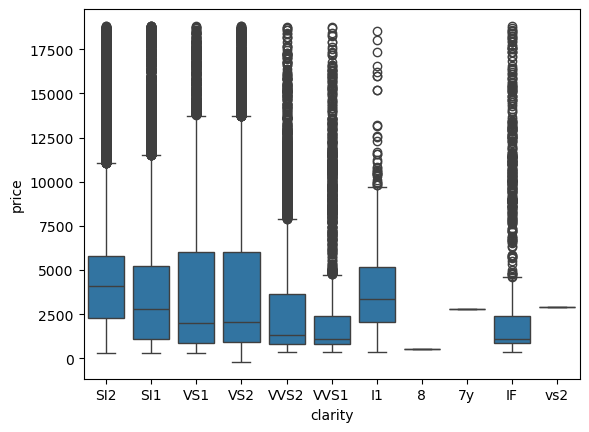

In [179]:
sns.boxplot(x="clarity", y="price", data=df)
plt.show()


### 5- Correlation Heatmap (Numeric)

carat, x, y, z highly correlated with price

Dimensions strongly related to weight.

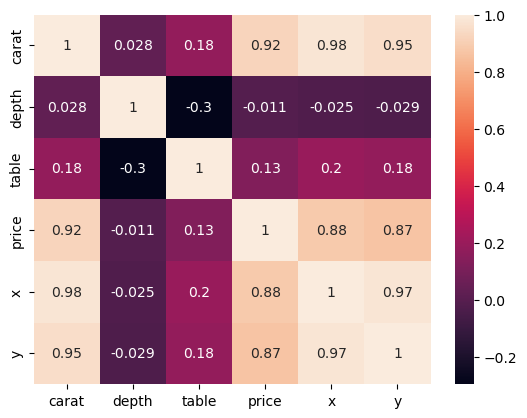

In [180]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()